In [1]:
import pandas as pd

In [2]:
path = './new_cleaned'
topics_dataset = f'{path}/cleaned_topics_all.csv'

In [3]:
df_topics = pd.read_csv(topics_dataset)

In [4]:
topics_20_completions = df_topics.drop(df_topics[df_topics.last_3_month_completed_step_users_count < 20].index)
topics_20_completions.shape

(1064, 15)

## Get text statistics

In [ ]:
# !pip3 install py-readability-metrics

In [ ]:
# !python3 -m nltk.downloader punkt

In [4]:
from readability import Readability

In [5]:
def statistics_readability(text):
    stat = Readability(text)
    stat_values = stat.statistics()  
    # this library uses TweetTokenizer from nltk.tokenizers to tokenize words
    # and sent_tokenizer (also from nltk) to tokenize sentences 
    
    return stat_values['num_words'], stat_values['num_sentences'], stat_values['num_syllables']

In [6]:
words_list, sentences_list, syllables_list = [], [], [] 

for i, text in enumerate(df_topics.cleaned_texts):
    if i % 50 == 0:
        print(i)
    try:
        words, sentences, syllables = statistics_readability(text)
    except:
        raise
    words_list.append(words)
    sentences_list.append(sentences)
    syllables_list.append(syllables)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300


In [7]:
df_topics['num_words'] = words_list
df_topics['num_sentences'] = sentences_list
df_topics['num_syllables'] = syllables_list

In [8]:
df_topics.head()

,step_id,is_theory,text,seconds_to_complete,last_3_month_completion_rate,last_3_month_completed_step_users_count,last_3_month_avg_like,last_3_month_likes_count,last_3_month_topic_completion_rate,last_3_month_completed_topic_users_count,back_to_theory_times_per_user_session_avg_last_3_month,back_to_theory_users_%_last_3_month,cleaned_texts,num_headings,symbols_in_snippets,num_words,num_sentences,num_syllables
0,12357,1,"""<h5 id=\""introduction\""> Introduction</h5>\n\...",603.45,0.56,40.0,2.00,10.0,0.90,35.0,1.43,67.21,""" *heading* So far you have learned quite a lo...",6,790,618,24,995
1,12691,1,"""<p>JavaScript was originally developed as a l...",253.21,0.87,884.0,1.72,79.0,0.96,844.0,0.34,24.43,"""JavaScript was originally developed as a lang...",5,35,605,35,962
2,8112,1,"""<p>We've already learned what annotations are...",486.94,0.45,50.0,1.57,7.0,0.89,49.0,1.00,69.41,"""We've already learned what annotations are an...",3,1506,610,30,990
3,7892,1,"""<h5>Introduction</h5>\n\n<p>You often hear pe...",542.73,0.72,60.0,2.00,5.0,0.91,58.0,0.33,26.39,""" *heading* You often hear people speak about ...",5,0,1079,51,1652
4,15809,1,"""<h5>Introduction</h5>\n\n<p>When you have alr...",556.76,0.43,43.0,1.40,10.0,0.91,53.0,0.93,50.88,""" *heading* When you have already learned the ...",5,409,633,21,995


In [9]:
# normalized seconds_to_complete
norm_seconds_list = []

for i, row in df_topics.iterrows():
    norm_seconds = (row.seconds_to_complete / row.num_words) * 10
    norm_seconds_list.append(norm_seconds)
    
df_topics['norm_seconds'] = norm_seconds_list

In [10]:
# average sentence length
asl_list = []

for i, row in df_topics.iterrows():
    asl = row.num_words / row.num_sentences
    asl_list.append(asl)
    
df_topics['ASL'] = asl_list

## Get readability scores

In [11]:
def get_two_scores(text):
    r = Readability(text)
    dc = r.dale_chall()
    fl = r.flesch()
    return dc.score, fl.score

In [12]:
dc_scores, fl_scores = [], [] 

for i, text in enumerate(df_topics.cleaned_texts):
    if i % 50 == 0:
        print(i)
    try:
        dc, fl = get_two_scores(text)
    except:
        print('###', i)
        raise
    dc_scores.append(dc)
    fl_scores.append(fl)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300


In [13]:
df_topics['flesch_score'] = fl_scores
df_topics['dale_chall_score'] = dc_scores

In [14]:
df_topics.head()

,step_id,is_theory,text,seconds_to_complete,last_3_month_completion_rate,last_3_month_completed_step_users_count,last_3_month_avg_like,last_3_month_likes_count,last_3_month_topic_completion_rate,last_3_month_completed_topic_users_count,...,cleaned_texts,num_headings,symbols_in_snippets,num_words,num_sentences,num_syllables,norm_seconds,ASL,flesch_score,dale_chall_score
0,12357,1,"""<h5 id=\""introduction\""> Introduction</h5>\n\...",603.45,0.56,40.0,2.00,10.0,0.90,35.0,...,""" *heading* So far you have learned quite a lo...",6,790,618,24,995,9.764563,25.750000,44.490012,9.180577
1,12691,1,"""<p>JavaScript was originally developed as a l...",253.21,0.87,884.0,1.72,79.0,0.96,844.0,...,"""JavaScript was originally developed as a lang...",5,35,605,35,962,4.185289,17.285714,54.769008,9.896400
2,8112,1,"""<p>We've already learned what annotations are...",486.94,0.45,50.0,1.57,7.0,0.89,49.0,...,"""We've already learned what annotations are an...",3,1506,610,30,990,7.982623,20.333333,48.895027,9.097296
3,7892,1,"""<h5>Introduction</h5>\n\n<p>You often hear pe...",542.73,0.72,60.0,2.00,5.0,0.91,58.0,...,""" *heading* You often hear people speak about ...",5,0,1079,51,1652,5.029935,21.156863,55.834186,9.207762
4,15809,1,"""<h5>Introduction</h5>\n\n<p>When you have alr...",556.76,0.43,43.0,1.40,10.0,0.91,53.0,...,""" *heading* When you have already learned the ...",5,409,633,21,995,8.795577,30.142857,43.258957,9.721412


In [15]:
print(df_topics.shape)
df_topics = df_topics.dropna()
df_topics.shape

(1318, 22)


(1318, 22)

In [16]:
df_topics.to_csv(f'{path}/topics_all_statistics_and_scores.csv', index=False)

## Look at distribution

In [19]:
import matplotlib.pyplot as plt

In [24]:
import numpy as np

In [20]:
plt.rcParams["figure.figsize"] = (20, 3)

In [21]:
def plot_parameter(df, column_name, ticks, bins=300):
    plt.hist(df[column_name], bins)
    start_range = min(0, round(min(df[column_name]), int(ticks*10)))
    end_range = max(df[column_name])+ticks
    plt.xticks(np.arange(start_range, end_range, ticks))
    plt.title(column_name)
    plt.show()

In [17]:
df_topics.columns
# num_headings
# symbols_in_snippets
# num_words
# num_sentences
# num_syllables
# norm_seconds
# flesch_score
# dale_chall_score

Index(['step_id', 'is_theory', 'text', 'seconds_to_complete',
       'last_3_month_completion_rate',
       'last_3_month_completed_step_users_count', 'last_3_month_avg_like',
       'last_3_month_likes_count', 'last_3_month_topic_completion_rate',
       'last_3_month_completed_topic_users_count',
       'back_to_theory_times_per_user_session_avg_last_3_month',
       'back_to_theory_users_%_last_3_month', 'cleaned_texts', 'num_headings',
       'symbols_in_snippets', 'num_words', 'num_sentences', 'num_syllables',
       'norm_seconds', 'ASL', 'flesch_score', 'dale_chall_score'],
      dtype='object')

In [18]:
topics_20_completions = df_topics.drop(df_topics[df_topics.last_3_month_completed_step_users_count < 20].index)
topics_20_completions.shape

(1064, 22)

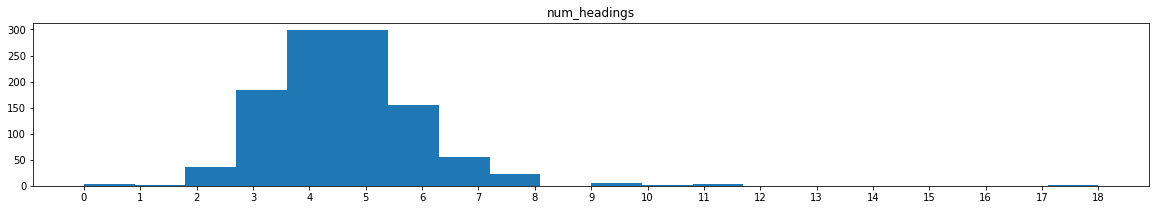

In [26]:
plot_parameter(topics_20_completions, 'num_headings', ticks=1, bins=20)

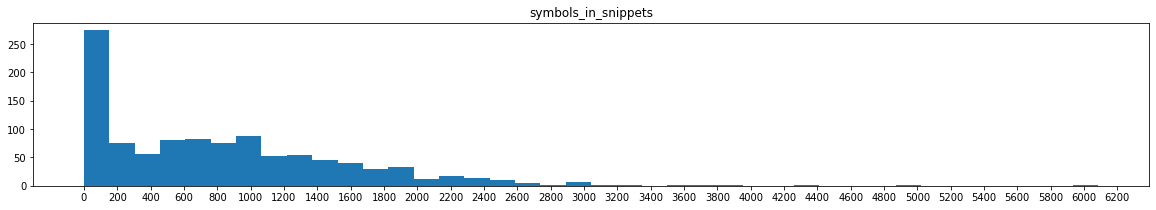

In [30]:
plot_parameter(topics_20_completions, 'symbols_in_snippets', ticks=200, bins=40)

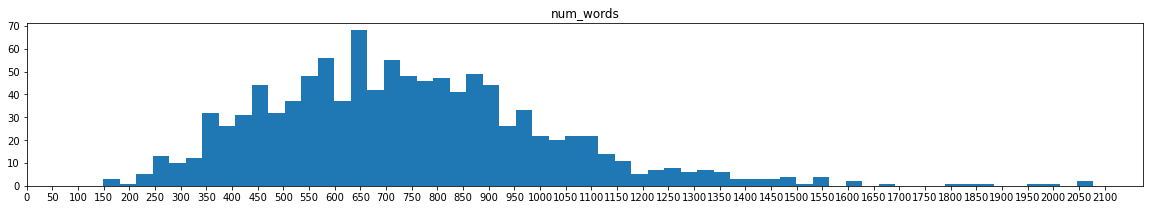

In [32]:
plot_parameter(topics_20_completions, 'num_words', ticks=50, bins=60)

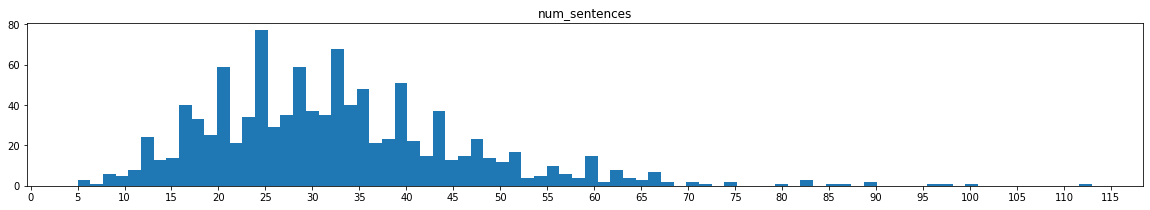

In [36]:
plot_parameter(topics_20_completions, 'num_sentences', ticks=5, bins=80)

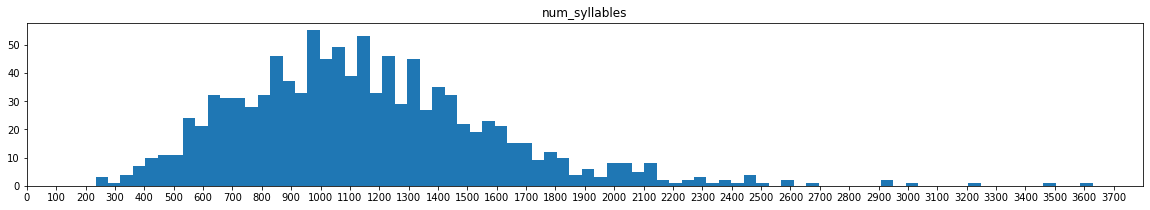

In [38]:
plot_parameter(topics_20_completions, 'num_syllables', ticks=100, bins=80)

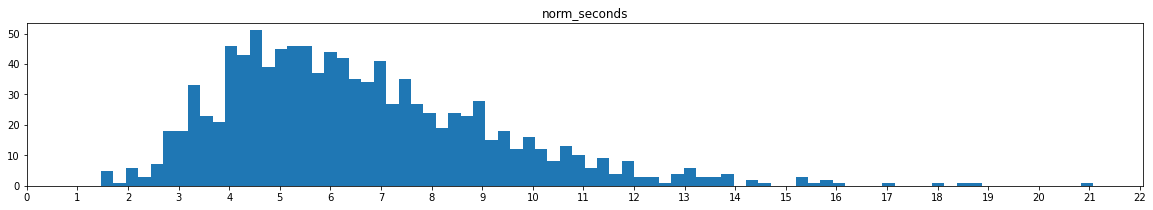

In [41]:
plot_parameter(topics_20_completions, 'norm_seconds', ticks=1, bins=80)

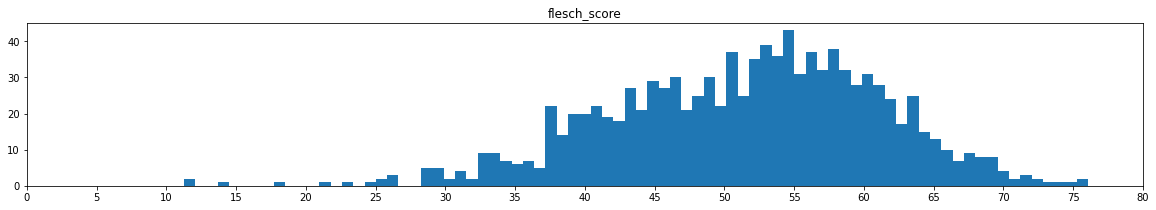

In [43]:
plot_parameter(topics_20_completions, 'flesch_score', ticks=5, bins=80)

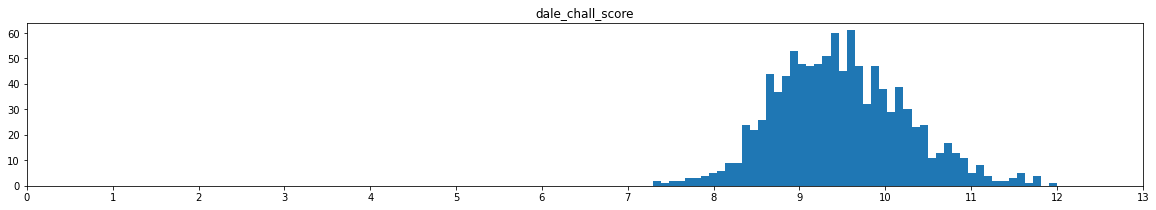

In [46]:
plot_parameter(topics_20_completions, 'dale_chall_score', ticks=1, bins=50)

## Compute other readability scores

In [19]:
def get_all_scores(text):
    r = Readability(text)
    
    try:
        fk = r.flesch_kincaid().score
    except:  # readability.ReadabilityException:
        fk = 0
    
    try:
        gf = r.gunning_fog().score
    except:
        gf = 0
        
    try:
        cl = r.coleman_liau().score
    except:
        cl = 0
        
    try:
        ari = r.ari().score
    except:
        ari = 0
        
    try:
        lw = r.linsear_write().score
    except:
        lw = 0
        
    try:
        smog = r.smog().score
    except:
        smog = 0
        
    try:
        spache = r.spache().score
    except:
        spache = 0
        
    return fk, gf, cl, ari, lw, smog, spache

In [20]:
scores = ['flesch_kincaid', 'gunning_fog', 'coleman_liau', 'ari', 'linsear_write', 'smog', 'spache']

dict_scores = {}
for score in scores:
    dict_scores[score] = []

In [21]:
for i, text in enumerate(df_topics.cleaned_texts):
    if i % 100 == 0:
        print(i)
    try:
        fk, gf, cl, ari, lw, smog, spache = get_all_scores(text)
    except:
        print('###', i)
        raise
        
    dict_scores['flesch_kincaid'].append(fk)
    dict_scores['gunning_fog'].append(gf)
    dict_scores['coleman_liau'].append(cl)
    dict_scores['ari'].append(ari)
    dict_scores['linsear_write'].append(lw)
    dict_scores['smog'].append(smog)
    dict_scores['spache'].append(spache)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


In [22]:
df_topics['flesch_kincaid_score'] = dict_scores['flesch_kincaid']
df_topics['gunning_fog_score'] = dict_scores['gunning_fog']
df_topics['coleman_liau_score'] = dict_scores['coleman_liau']
df_topics['ari_score'] = dict_scores['ari']
df_topics['linsear_write_score'] = dict_scores['linsear_write']
df_topics['smog_score'] = dict_scores['smog']
df_topics['spache_score'] = dict_scores['spache']

In [23]:
path = '/home/anna/Documents/Diploma/code/new_cleaned'

In [24]:
df_topics.to_csv(f'{path}/topics_all_statistics_and_MORE_scores.csv', index=False)

In [25]:
# how many topics have a zero score (it was not computed)
for score in scores:
    print(score)
    print(df_topics[df_topics[f'{score}_score'] == 0].shape[0])

flesch_kincaid
0
gunning_fog
0
coleman_liau
0
ari
0
linsear_write
0
smog
570
spache
0


In [ ]:
# for smog the text should be at least 30 sents long

In [26]:
smog_zero = df_topics[df_topics['smog_score'] == 0]
smog_zero = smog_zero[['step_id', 'cleaned_texts', 'num_words', 'num_sentences', 'smog_score']]
smog_zero.head()

,step_id,cleaned_texts,num_words,num_sentences,smog_score
0,12357,""" *heading* So far you have learned quite a lo...",618,24,0.0
4,15809,""" *heading* When you have already learned the ...",633,21,0.0
7,8754,"""Making a site, we want to isolate the process...",585,24,0.0
11,11290,"""You already have a basic idea of collections,...",537,17,0.0
14,16308,"""You are already familiar with the main collec...",489,18,0.0
